In [1]:
import skfem
import meshio
import numpy as np
import matplotlib.pyplot as plt
import h5py

import pandas as pd
from skfem import (
    MeshTri, Basis, FacetBasis, ElementTriP2, ElementTriP1, ElementVector,ElementTriP3, ElementTriP4,
    asm, bmat, condense, solve, BilinearForm, LinearForm
)
from skfem.models.general import divergence
from skfem.models.poisson import vector_laplace, mass
from skfem.helpers import grad, dot, laplacian, read_meshh5

import scipy.sparse as sp
from scipy.sparse.linalg import eigsh, eigs, splu, LinearOperator

import scipy.linalg
import pandas as pd


In [2]:
def graficar_stokes(u_sol, p_sol, mesh, basis_p, basis_u, scale = 20):
    
    Nu = basis_u.N
    
    # Visualización
    fig, axes = plt.subplots(1, 2, figsize=(12, 6))

    # Separar componentes de velocidad
    # Para ElementVector, los DOFs están organizados por componente
    n_nodes = Nu // 2
    u_x = u_sol[0::2]  # componente x
    u_y = u_sol[1::2]  # componente y

    # Magnitud de velocidad
    u_magnitude = np.sqrt(u_x**2 + u_y**2)

    # Magnitud de velocidad
    basis_u.plot(u_magnitude, ax=axes[0], shading='gouraud', colorbar=True, cmap='viridis')
    axes[0].set_title(r'Magnitud de velocidad $|\mathbf{u}|$')
    axes[0].set_aspect('equal')

    # Presión
    basis_p.plot(p_sol, ax=axes[1], shading='gouraud', colorbar=True, colormap='viridis', cmap='viridis')
    axes[1].set_title(r'Presión $p$')
    axes[1].set_aspect('equal')
    plt.tight_layout()
    plt.show()    


### U refinado

In [10]:
eig_u = pd.read_csv('eigenfunctions/velocity_eigenfunctions_u_refinado.csv')
eig_p = pd.read_csv('eigenfunctions/pressure_eigenfunctions_u_refinado.csv')

In [11]:
f = h5py.File('umesh_h3.h5', 'r')
coordinates_mesh = f['mesh/coordinates'][:]
elements_mesh    = f['mesh/topology'][:]
mesh = MeshTri(coordinates_mesh.T, elements_mesh.T)

# Definir elementos y bases (P2 para velocidad, P1 para presión)
element = {
    'u': ElementVector(ElementTriP2()),
    'p': ElementTriP1(),
}
basis = {
    'u': Basis(mesh, element['u'], intorder=4),
    'p': Basis(mesh, element['p'], intorder=4),
}
basis_u, basis_p = basis['u'], basis['p']
Nu, Np = basis_u.N, basis_p.N
N      = Nu + Np

Transforming over 1000 vertices to C_CONTIGUOUS.
Transforming over 1000 elements to C_CONTIGUOUS.


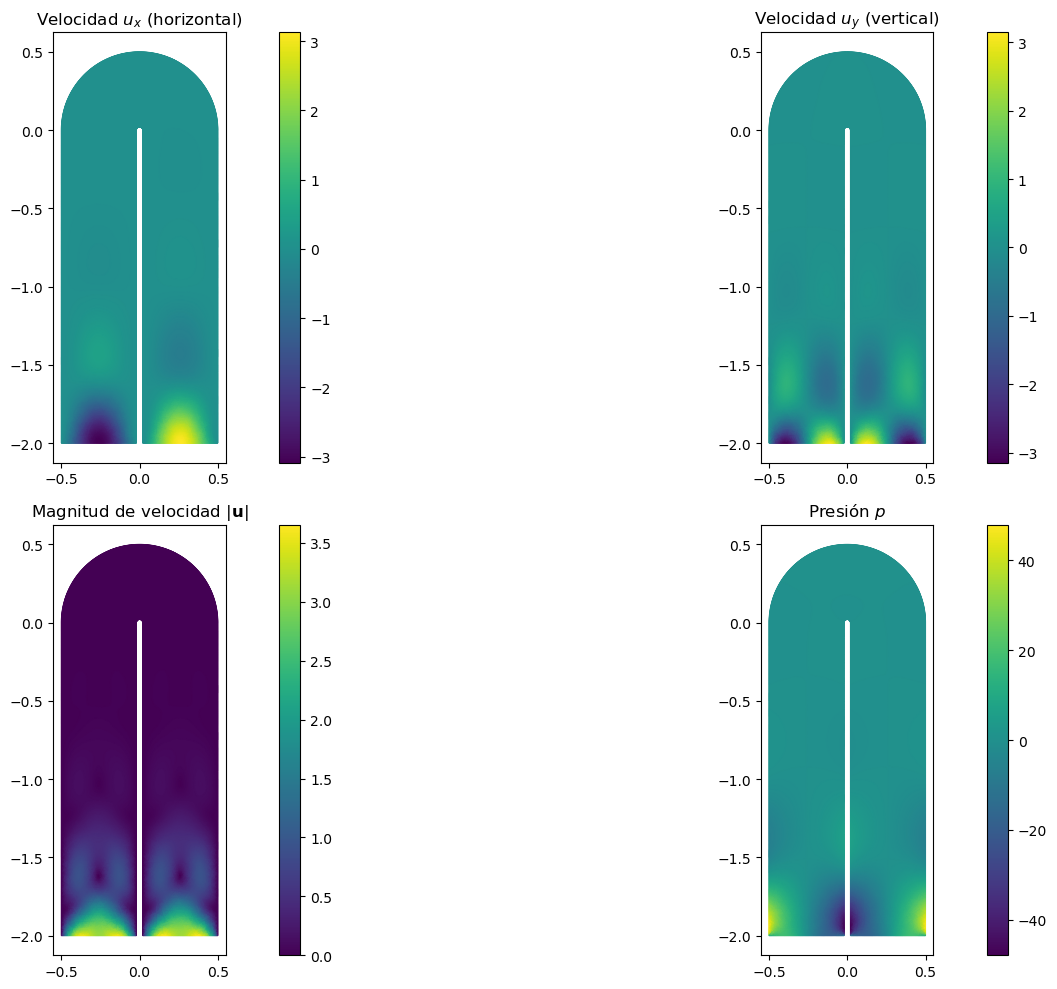

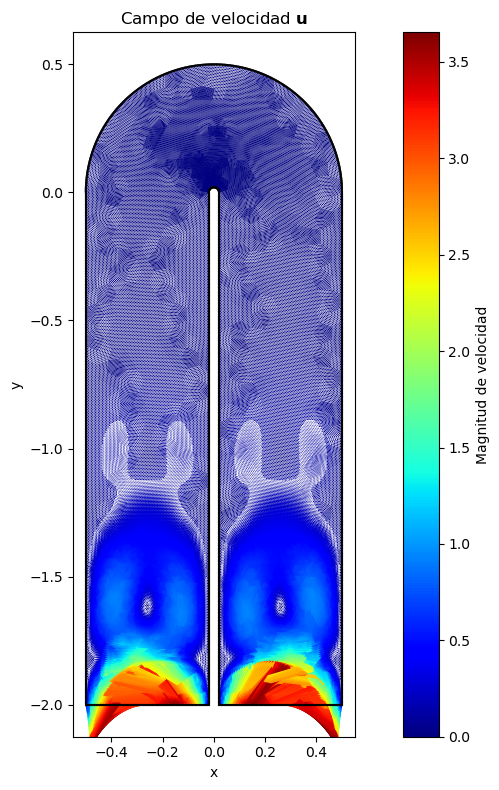

In [12]:
graficar_stokes(eig_u.iloc[:,1].values, eig_p.iloc[:,1].values, mesh, basis_p, basis_u)

### Arterias

In [3]:
eigmodes = np.load('eigenmodes_arterias_2D_norm_refinado0.npz')
eig_u = eigmodes['velocity']
eig_p = eigmodes['pressure']

In [4]:
mesh, _, __ = read_meshh5('mallas/Carotid_h1.h5')
basis_u = Basis(mesh, ElementTriP2(), intorder=4)
basis_p = Basis(mesh, ElementTriP1(), intorder=4)

Transforming over 1000 vertices to C_CONTIGUOUS.
Transforming over 1000 elements to C_CONTIGUOUS.


In [ ]:
fig, axes = plt.subplots(5, 4, figsize=(20, 24))
axes = axes.flatten()

for i in range(20):
    Nu = basis_u.N
    n_nodes = Nu // 2
    u_x = eig_u[:, i][0::2]
    u_y = eig_u[:, i][1::2]
    u_magnitude = np.sqrt(u_x**2 + u_y**2)
    basis_u.plot(u_magnitude, ax=axes[i], shading='gouraud', colorbar=False, cmap='viridis')
    axes[i].set_title(f'Autofunción {i+1}')
    axes[i].set_aspect('equal')

plt.tight_layout()
# plt.show()
plt.savefig('eigenfunctions_velocity_carotid_refinado.png', dpi=300)
plt.close()

In [39]:
fig, axes = plt.subplots(5, 4, figsize=(20, 24))
axes = axes.flatten()

for i in range(20):
    Nu = basis_p.N
    basis_p.plot(eig_p[:, i], ax=axes[i], shading='gouraud', colorbar=False, cmap='viridis')
    axes[i].set_title(f'Autofunción {i+1}')
    axes[i].set_aspect('equal')

plt.tight_layout()
# plt.show()
plt.savefig('eigenfunctions_pressure_carotid_refinado.png', dpi=300)
plt.close()

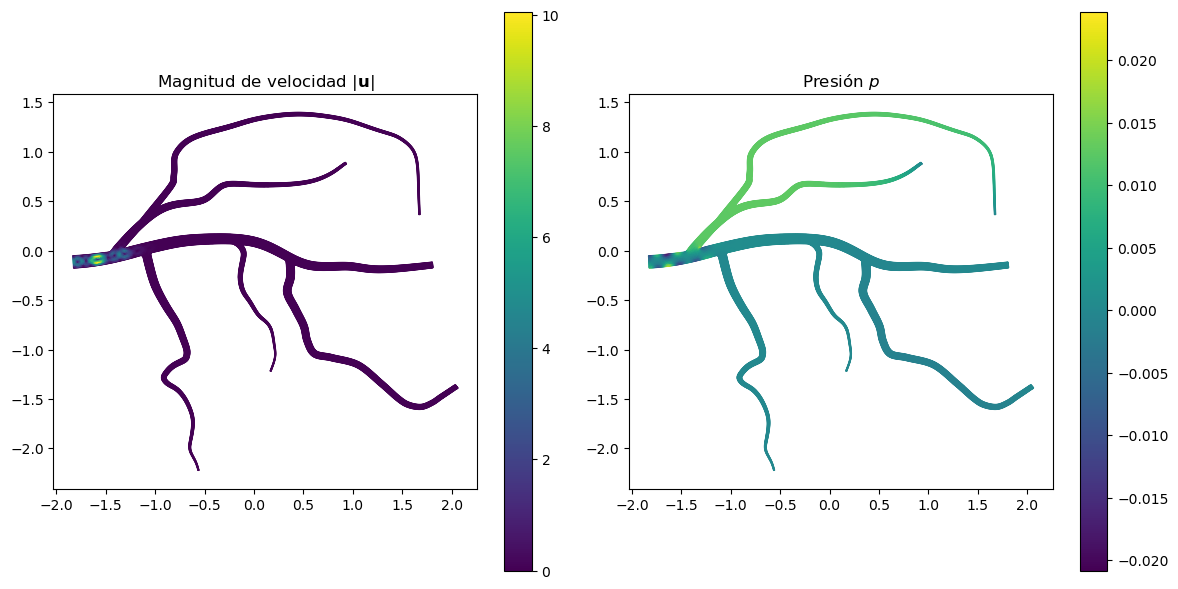

In [34]:
idx = 8
graficar_stokes(eig_u[:,idx], eig_p[:,idx], mesh, basis_p, basis_u)

Refinado 1 vez

In [22]:
eigmodes_R1 = np.load('eigenmodes_arterias_2D_norm_refinado1.npz')
eig_u_R1 = eigmodes_R1['velocity']
eig_p_R1 = eigmodes_R1['pressure']

In [23]:
mesh, _, __ = read_meshh5('mallas/Carotid_h1.h5')
mesh_R1 = mesh.refined(1)
basis_u_R1 = Basis(mesh_R1, ElementTriP2(), intorder=4)
basis_p_R1 = Basis(mesh_R1, ElementTriP1(), intorder=4)

Transforming over 1000 vertices to C_CONTIGUOUS.
Transforming over 1000 elements to C_CONTIGUOUS.


In [ ]:
fig, axes = plt.subplots(5, 4, figsize=(20, 24))
axes = axes.flatten()

for i in range(20):
    Nu = basis_u.N
    n_nodes = Nu // 2
    u_x = eig_u_R1[:, i][0::2]
    u_y = eig_u_R1[:, i][1::2]
    u_magnitude = np.sqrt(u_x**2 + u_y**2)
    basis_u.plot(u_magnitude, ax=axes[i], shading='gouraud', colorbar=False, cmap='viridis')
    axes[i].set_title(f'Autofunción {i+1}')
    axes[i].set_aspect('equal')

plt.tight_layout()
# plt.show()
plt.savefig('eigenfunctions_velocity_carotid_refinado.png', dpi=300)
plt.close()
fig, axes = plt.subplots(5, 4, figsize=(20, 24))
axes = axes.flatten()

for i in range(20):
    Nu = basis_p.N
    basis_p.plot(eig_p[:, i], ax=axes[i], shading='gouraud', colorbar=False, cmap='viridis')
    axes[i].set_title(f'Autofunción {i+1}')
    axes[i].set_aspect('equal')

plt.tight_layout()
# plt.show()
plt.savefig('eigenfunctions_pressure_carotid_refinado.png', dpi=300)
plt.close()

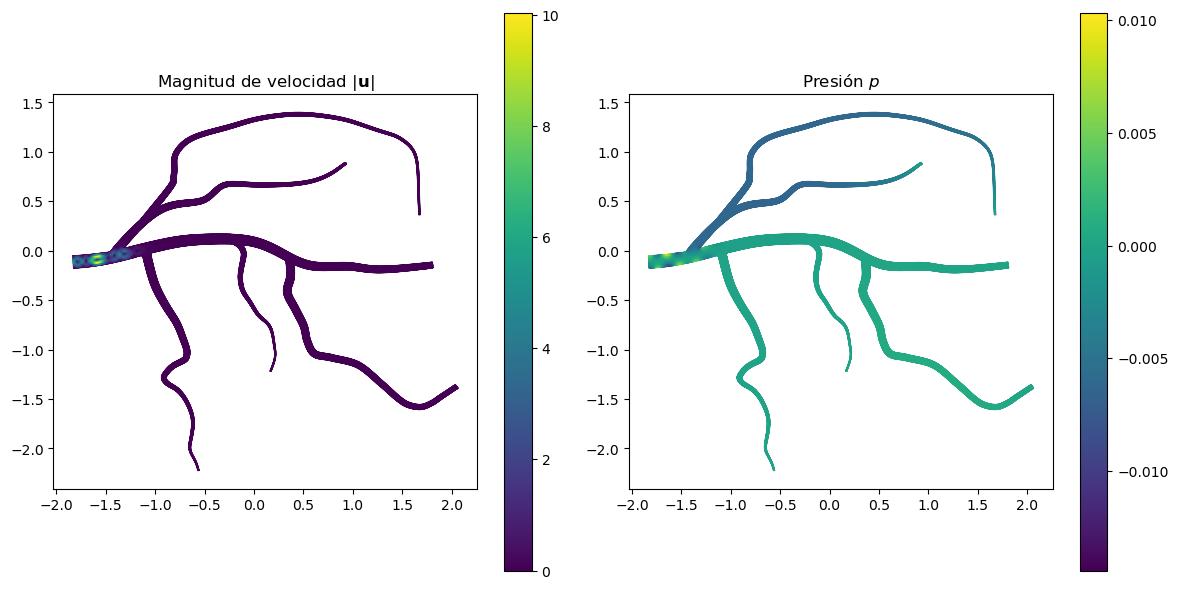

In [35]:
idx = 8
graficar_stokes(eig_u_R1[:,idx], eig_p_R1[:,idx], mesh_R1, basis_p_R1, basis_u_R1)

Refinado 2 veces

In [23]:
eigmodes_R2 = np.load('eigenmodes_arterias_2D_norm_refinado2.npz')
eig_u_R2 = eigmodes_R2['velocity']
eig_p_R2 = eigmodes_R2['pressure']

In [24]:
mesh, _, __ = read_meshh5('mallas/Carotid_h1.h5')
mesh_R2 = mesh.refined(2)
basis_u_R2 = Basis(mesh, ElementTriP2(), intorder=4)
basis_p_R2 = Basis(mesh, ElementTriP1(), intorder=4)

Transforming over 1000 vertices to C_CONTIGUOUS.
Transforming over 1000 elements to C_CONTIGUOUS.


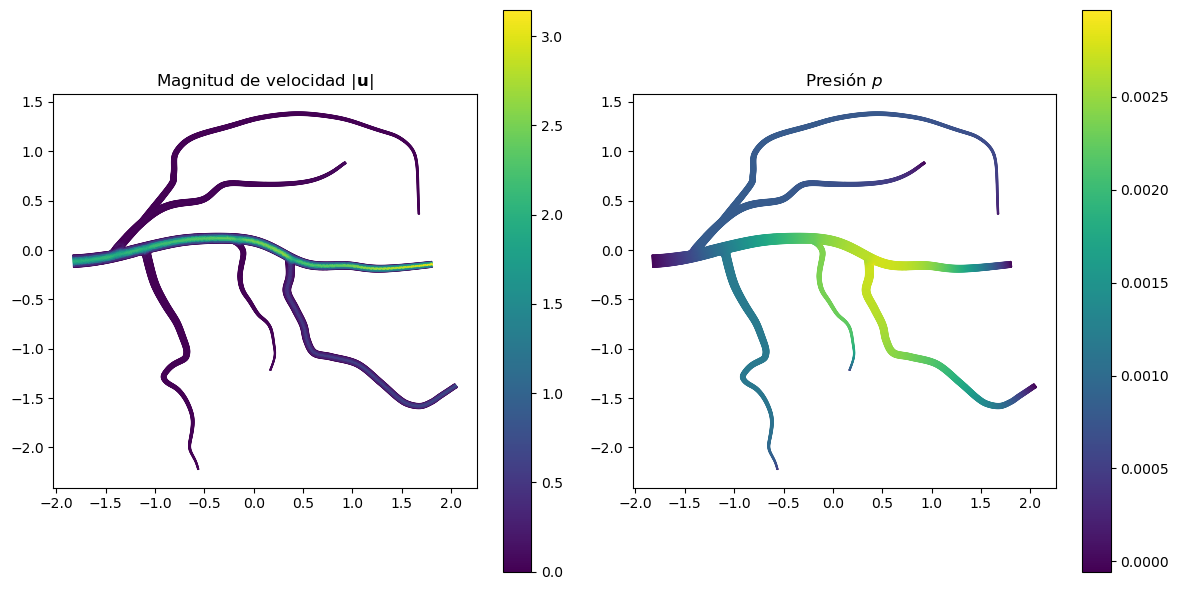

In [ ]:
idx = 0
graficar_stokes(eig_u_R2[:,idx], eig_p_R2[:,idx], mesh_R2, basis_p_R2, basis_u_R2)

Refinado P3 y P2

In [25]:
eigmodes_p3p2 = np.load('eigenmodes_arterias_2D_norm_p3p2.npz')
eig_u_p3p2 = eigmodes_p3p2['velocity']
eig_p_p3p2 = eigmodes_p3p2['pressure']

In [26]:
mesh, _, __ = read_meshh5('mallas/Carotid_h1.h5')
basis_u_p3p2 = Basis(mesh, ElementTriP3(), intorder=6)
basis_p_p3p2 = Basis(mesh, ElementTriP2(), intorder=6)

Transforming over 1000 vertices to C_CONTIGUOUS.
Transforming over 1000 elements to C_CONTIGUOUS.


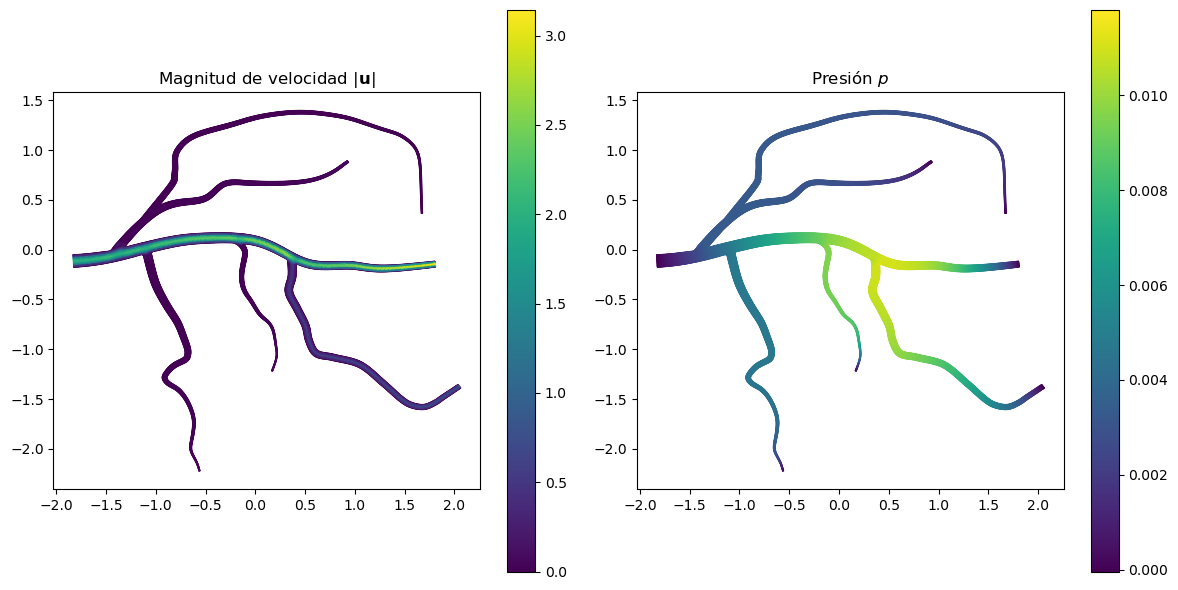

In [27]:
idx = 0
graficar_stokes(eig_u_p3p2[:,idx], eig_p_p3p2[:,idx], mesh, basis_p_p3p2, basis_u_p3p2)

In [28]:
eigmodes_p4p3 = np.load('eigenmodes_arterias_2D_norm_p4p3.npz')
eig_u_p4p3 = eigmodes_p4p3['velocity']
eig_p_p4p3 = eigmodes_p4p3['pressure']

In [29]:
mesh, _, __ = read_meshh5('mallas/Carotid_h1.h5')
basis_u_p4p3 = Basis(mesh, ElementTriP4(), intorder=6)
basis_p_p4p3 = Basis(mesh, ElementTriP3(), intorder=6)

Transforming over 1000 vertices to C_CONTIGUOUS.
Transforming over 1000 elements to C_CONTIGUOUS.


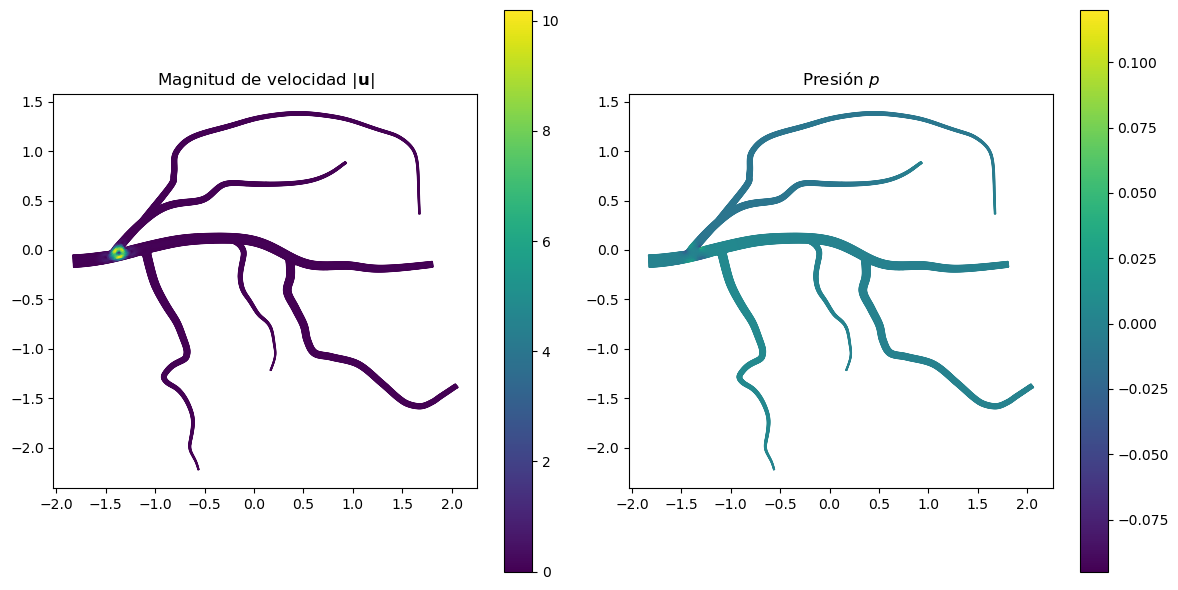

In [77]:
idx = 1
graficar_stokes(eig_u_p4p3[:,idx], eig_p_p4p3[:,idx], mesh, basis_p_p4p3, basis_u_p4p3)

In [79]:
basis_p2 = basis_u_p4p3.with_element(ElementTriP2())
basis_p1 = basis_p_p4p3.with_element(ElementTriP1())
idx = 1

n_modes = eig_u_p4p3.shape[1]

u_projected_all = np.zeros((basis_p2.N * 2, n_modes))
p_projected_all = np.zeros((basis_p1.N, n_modes))

for idx in range(n_modes):
    x      = eig_u_p4p3[::2, idx]
    y      = eig_u_p4p3[1::2, idx]
    x_p2   = basis_p2.project(basis_u_p4p3.interpolate(x))
    y_p2   = basis_p2.project(basis_u_p4p3.interpolate(y))
    u_proj = np.zeros(basis_p2.N * 2)
    u_proj[::2]  = x_p2
    u_proj[1::2] = y_p2
    u_projected_all[:, idx] = u_proj

    p_projected_all[:, idx] = basis_p1.project(basis_p_p4p3.interpolate(eig_p_p4p3[:, idx]))

In [83]:
# Exportar 
np.savez_compressed(
    'eigenmodes_arterias_2D_norm_projected.npz',
    velocity=u_projected_all,
    pressure=p_projected_all)

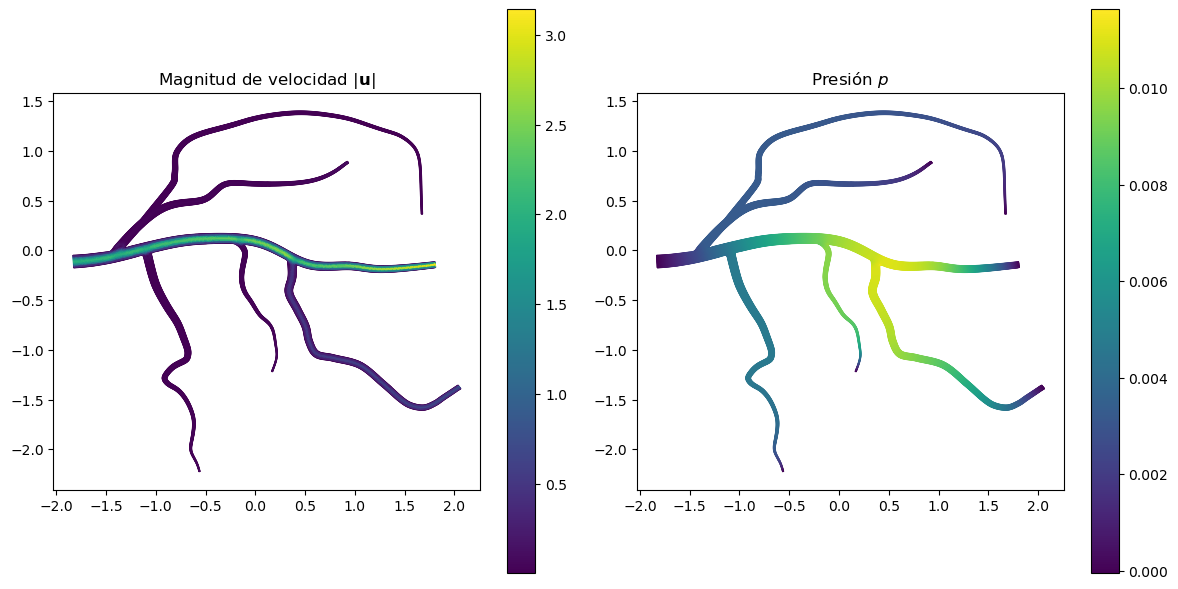

In [85]:
idx = 0
graficar_stokes(u_projected_all[:, idx], p_projected_all[:, idx], mesh, basis_p1, basis_p2)